In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Perclos = ctrl.Antecedent(np.arange(0,101,1), 'Perclos')
Blink_Frequency = ctrl.Antecedent(np.arange(0,26,1), 'Blink_Frequency')
Avg_Eye_Closure = ctrl.Antecedent(np.arange(0,7,0.1), 'Avg_Eye_Closure')
Avg_Mouth_Closure = ctrl.Antecedent(np.arange(0,7,0.1), 'Avg_Mouth_Closure')

State = ctrl.Consequent(np.arange(-1,2,1), 'State')

Perclos['low'] = fuzz.trapmf(Perclos.universe, [0, 0, 30, 45])
Perclos['medium'] = fuzz.trimf(Perclos.universe, [30, 45, 60])
Perclos['high'] = fuzz.trapmf(Perclos.universe, [45, 60, 100, 100])

Blink_Frequency['danger'] = fuzz.trapmf(Blink_Frequency.universe, [0, 0, 5, 10])
Blink_Frequency['safe'] = fuzz.trimf(Blink_Frequency.universe, [5, 10, 15])
Blink_Frequency['notsafe'] = fuzz.trapmf(Blink_Frequency.universe, [10, 15, 25, 25])

Avg_Eye_Closure['low'] = fuzz.trimf(Avg_Eye_Closure.universe, [0, 0, 4])
Avg_Eye_Closure['medium'] = fuzz.trimf(Avg_Eye_Closure.universe, [2, 4, 6])
Avg_Eye_Closure['high'] = fuzz.trimf(Avg_Eye_Closure.universe, [4, 6, 6])

Avg_Mouth_Closure['low'] = fuzz.trimf(Avg_Mouth_Closure.universe, [0, 0, 4])
Avg_Mouth_Closure['medium'] = fuzz.trimf(Avg_Mouth_Closure.universe, [2, 4, 6])
Avg_Mouth_Closure['high'] = fuzz.trimf(Avg_Mouth_Closure.universe, [4, 6, 6])

State['awake'] = fuzz.trimf(State.universe, [-1, -1, 0])
State['lowvigilant'] = fuzz.trimf(State.universe, [-1, 0, 1])
State['severedrowsy'] = fuzz.trimf(State.universe, [0, 1, 1])

rule1 = ctrl.Rule(Perclos['low'] | Blink_Frequency['safe'] | Avg_Eye_Closure['low'] | Avg_Mouth_Closure['low'], State['awake'])
rule2 = ctrl.Rule(Perclos['medium'] | Blink_Frequency['notsafe'] | Avg_Eye_Closure['medium'] | Avg_Mouth_Closure['medium'], State['lowvigilant'])
rule3 = ctrl.Rule(Perclos['high'] | Blink_Frequency['danger'] | Avg_Eye_Closure['high'] | Avg_Mouth_Closure['high'], State['severedrowsy'])

In [2]:
Driver_State_Detection = ctrl.ControlSystem([rule1, rule2, rule3])

In [3]:
Detect = ctrl.ControlSystemSimulation(Driver_State_Detection)

In [4]:
Detect.input['Perclos'] = 75
Detect.input['Blink_Frequency'] = 3
Detect.input['Avg_Eye_Closure'] = 7
Detect.input['Avg_Mouth_Closure'] = 7
Detect.compute()

0.6666666666666666


/home/ms/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


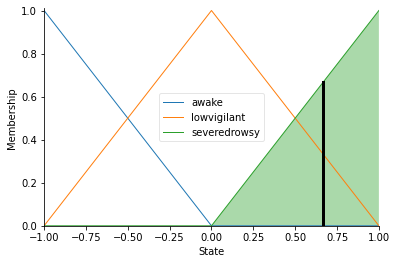

In [5]:
print(Detect.output['State'])
State.view(sim=Detect)

/home/ms/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


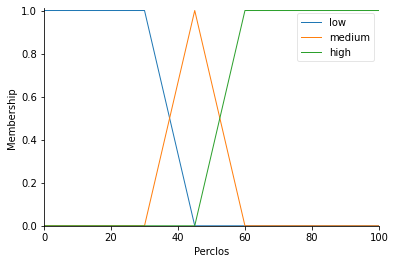

In [6]:
Perclos.view()

/home/ms/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


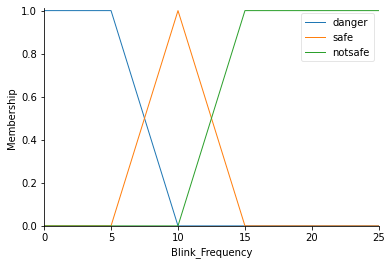

In [7]:
Blink_Frequency.view()

/home/ms/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


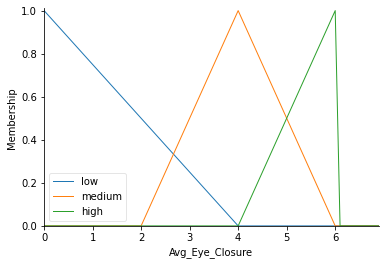

In [8]:
Avg_Eye_Closure.view()

/home/ms/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


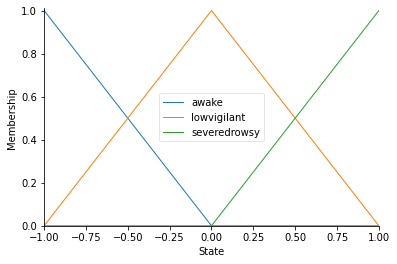

In [9]:
State.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

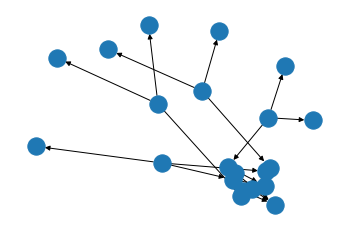

In [10]:
rule1.view()